# Figure 6

This notebook produces Figure 6 and other auxiliary figures.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib
# import matplotlib.pyplot as plt

## Get data

We load the data produced by the previous workflow stored as `../data/results/pej0_GrIS_classification.csv`. See `Fig5.ipynb` for more details.

In [2]:
df = pd.read_csv('../data/results/pej0_GrIS_classification.csv')
df

,$\frac{P_e}{\ell}$ (m$^{-1}$),$J_0$ (m yr$^{-1}$),Speed diff (m yr$^{-1}$)
0,0.000021,-915.378881,3029.186179
1,0.000306,-200.805053,511.123464
2,-0.000047,-82.857761,456.284207
3,-0.000034,-450.936824,-435.655180
4,0.000078,-1243.208582,-349.572187
...,...,...,...
99,0.000234,-112.716518,613.747370
100,0.000044,-167.859915,1023.168837
101,0.000054,-1081.388452,2774.927415
102,0.000315,5.479272,467.138448


This histogram gives a quick idea about the distribution of speed change:

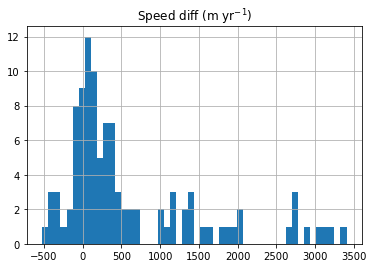

In [3]:
df.hist(column='Speed diff (m yr$^{-1}$)', bins=50);

## Visualization

We add a new column called `Legend` and classify the glaciers based on a simple threshold of speed change (here set to $\pm$300 m/yr):

In [4]:
newclass = []
count = 0
for idx, row in df.iterrows():
    if row['Speed diff (m yr$^{-1}$)'] >= 300 or row['Speed diff (m yr$^{-1}$)'] <= -300:
        newclass.append(r'$|\Delta V| \geq$ 300 m yr$^{-1}$')
        count += 1
    else:
        newclass.append(r'$|\Delta V| <$ 300 m yr$^{-1}$')

df['Legend'] = newclass
print('How many glaciers have a higher speed change?: {}'.format(count))
print('How many glaciers have a lower speed change?:  {}'.format(len(df) - count))

How many glaciers have a higher speed change?: 54
How many glaciers have a lower speed change?:  50


Finally, we plot **Figure 6**:

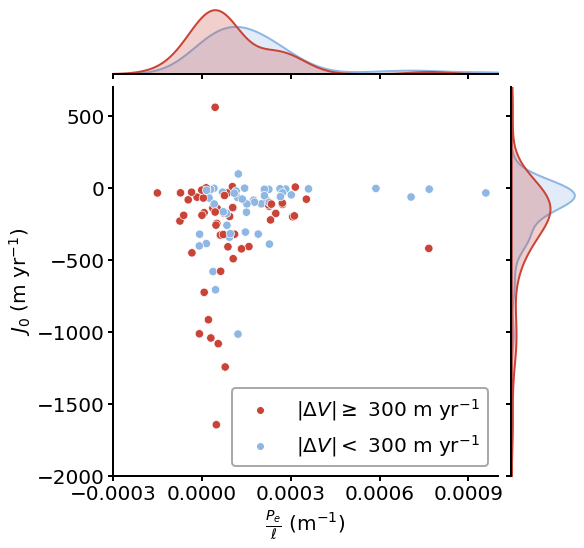

In [22]:
matplotlib.rc('font', size=20)
matplotlib.rc('axes', linewidth=2)

# fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))

cmap = {r'$|\Delta V| \geq$ 300 m yr$^{-1}$': '#C94337', r'$|\Delta V| <$ 300 m yr$^{-1}$': '#8EB7E4'}
f = sns.jointplot(data=df, x=r'$\frac{P_e}{\ell}$ (m$^{-1}$)', y=r'$J_0$ (m yr$^{-1}$)', hue="Legend", palette=cmap, 
                  joint_kws={"s": 70, }, marginal_kws={'linewidth': 2}, height=8)
f.ax_joint.set_xlim([-0.0003, 0.0010])
f.ax_joint.set_ylim([-2000, 700])
f.ax_joint.set_xticks([-0.0003, 0, 0.0003, 0.0006, 0.0009])
f.ax_joint.tick_params(width=2, length=5)
f.ax_marg_x.tick_params(width=2, length=5)
f.ax_marg_y.tick_params(width=2, length=5)
legend = f.ax_joint.legend(loc='lower right')
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('xkcd:gray')
f.savefig('../data/results/Fig6.pdf')